In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

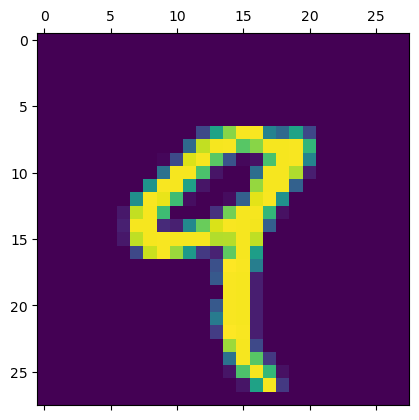

In [6]:
plt.matshow(X_train[4])

In [3]:
X_train = X_train / 255
X_test = X_test / 255

In [4]:
X_train_flattened =  X_train.reshape(len(X_train),28*28)

In [5]:
X_test_flattened =  X_test.reshape(len(X_test),28*28)

In [6]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,),activation = 'sigmoid')
])
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4713 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3047 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2732 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2668 - accuracy: 0.9257


In [11]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2683 - accuracy: 0.9251


[0.26831528544425964, 0.9251000285148621]

In [12]:
y_pre = model.predict(X_test_flattened)

313/313 [==============================] - 0s 896us/step


In [13]:
y_pre_labels = [np.argmax(i) for i in y_pre]
y_pre_labels[:5]

[7, 2, 1, 0, 4]

In [14]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pre_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    3,    4,    0,    8,    5,    3,    2,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    9,  928,   22,   10,    5,   10,   10,   32,    3],
       [   1,    0,   15,  945,    0,   12,    2,   11,   18,    6],
       [   1,    1,    3,    2,  921,    0,   10,    4,   10,   30],
       [   7,    3,    6,   49,   10,  766,    9,    9,   26,    7],
       [   9,    3,    7,    2,    8,   16,  908,    2,    3,    0],
       [   1,    6,   22,    8,    6,    0,    0,  951,    1,   33],
       [   6,    9,    7,   37,    9,   25,    8,   13,  852,    8],
       [   8,    7,    2,   15,   30,    4,    0,   28,    3,  912]])>

Text(95.72222222222221, 0.5, 'Truth')

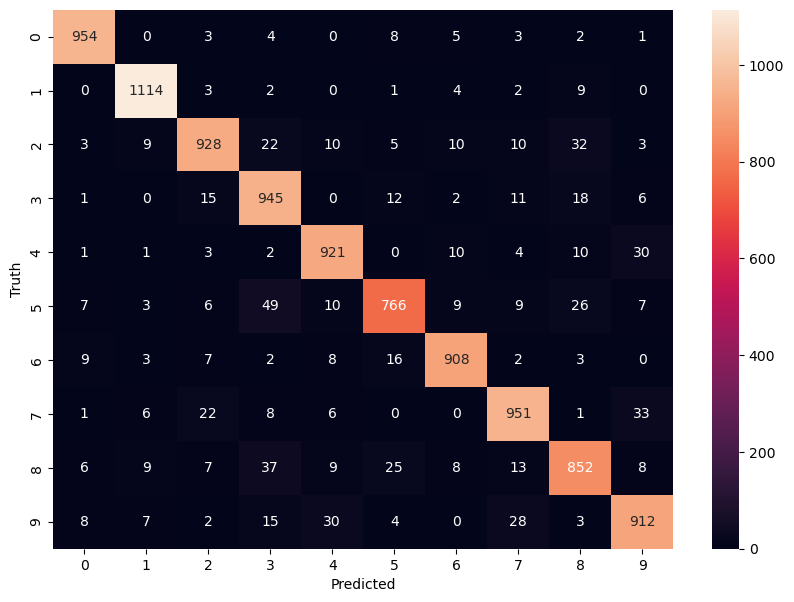

In [15]:
import seaborn as sn 
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')

])
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1227 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0655 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9844


In [17]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0766 - accuracy: 0.9762


[0.0766371414065361, 0.9761999845504761]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

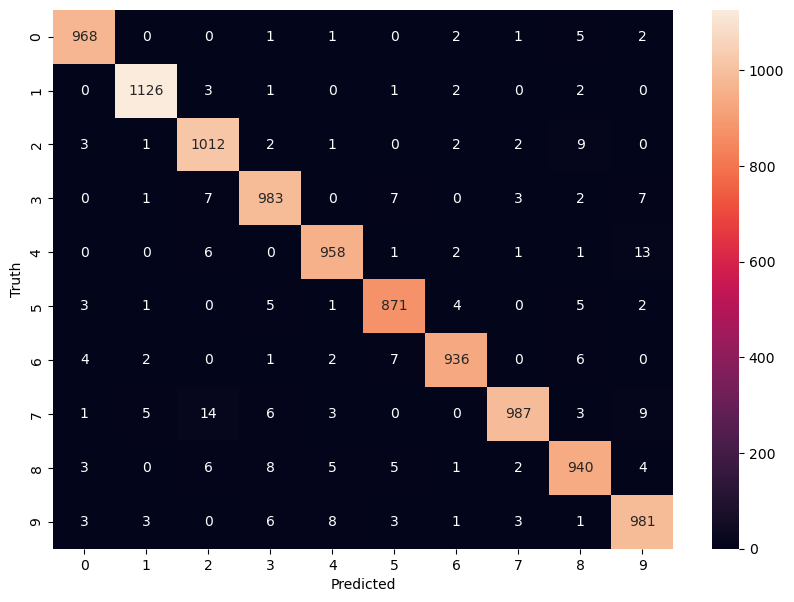

In [18]:
y_pre = model.predict(X_test_flattened)
y_pre_labels = [np.argmax(i) for i in y_pre]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pre_labels)
import seaborn as sn 
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
#     keras.layers.Dense(1000, activation = 'selu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')

])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir = 'logs/adma', histogram_freq = 1)

model.compile(optimizer='SGD',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 5, callbacks = [tb_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6573 - accuracy: 0.8326
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3367 - accuracy: 0.9064
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2871 - accuracy: 0.9196
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2571 - accuracy: 0.9277
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2343 - accuracy: 0.9345


In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2218 - accuracy: 0.9372


[0.2217586487531662, 0.9372000098228455]

In [21]:
import numpy
numpy.version.version

'1.24.4'